## FLIGHT PRICE PREDICTION
(EDA + Feature engineering)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## by writing this we dont need to use plot.show to show a diagram

In [2]:
train_df=pd.read_excel('/Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df=pd.read_excel('/Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
final_df= train_df.append(test_df)
final_df.head()

<ipython-input-4-b447bf38f6b3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df= train_df.append(test_df)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


date of journey is in string format so we need to convert in date time format

## feature engineering

In [6]:
final_df['date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['date']

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: date, Length: 13354, dtype: object

In [7]:
final_df['month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['year']=final_df['Date_of_Journey'].str.split('/').str[2]

you can see date , month , year columns created seperately in the end

In [8]:
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  date             13354 non-null  object 
 12  month            13354 non-null  object 
 13  year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


still these new 3 columns are in object data type so convert to int

In [10]:
final_df['date']=final_df['date'].astype(int)
final_df['month']=final_df['month'].astype(int)
final_df['year']=final_df['year'].astype(int)

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  date             13354 non-null  int64  
 12  month            13354 non-null  int64  
 13  year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.5+ MB


In [12]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

in arrival time column some instances even have date mentioned along with time which is of no use so we'll remove that

In [13]:
final_df['Arrival_Time']= final_df['Arrival_Time'].str.split(' ').str[0]

In [14]:
final_df['Arrival_hour']= final_df['Arrival_Time'].str.split(':').str[0]

In [15]:
final_df['Arrival_min']= final_df['Arrival_Time'].str.split(':').str[1]

In [16]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [17]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [18]:
final_df['Dep_hour']= final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_min']= final_df['Dep_Time'].str.split(':').str[1]
final_df['Dep_hour']=final_df['Dep_hour'].astype(int)
final_df['Dep_min']=final_df['Dep_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)

In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   date             13354 non-null  int64  
 9   month            13354 non-null  int64  
 10  year             13354 non-null  int64  
 11  Arrival_hour     13354 non-null  int64  
 12  Arrival_min      13354 non-null  int64  
 13  Dep_hour         13354 non-null  int64  
 14  Dep_min          13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


In [20]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [21]:
final_df['Total_Stops']= final_df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops' :2, '3 stops' :3, '4 stops' : 4})

In [22]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
date                  0
month                 0
year                  0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
dtype: int64

to find out which value is null in total_stops

In [23]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


since only one row has null value we can drop it easily

In [24]:
final_df= final_df.dropna(subset=['Total_Stops'])

In [25]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
date                  0
month                 0
year                  0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
dtype: int64

In [26]:
final_df.drop('Route',axis=1,inplace=True)

In [27]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


converting the duration entirely into minutes

In [28]:
final_df['Duration'].str.split(' ').str[0]

0        2h
1        7h
2       19h
3        5h
4        4h
       ... 
2666    23h
2667     2h
2668     6h
2669    15h
2670    14h
Name: Duration, Length: 13353, dtype: object

In [29]:
final_df['duration_hour'] = final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
final_df['duration_hour']

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: duration_hour, Length: 13353, dtype: object

In [30]:
# final_df['duration_hour']=final_df['duration_hour'].astype('int')

##from the above error we can see that there are certain records with duration only in minutes so have to drop them

In [31]:
final_df[final_df['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [32]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

##now convert the duration_hour into int from object type

In [33]:
final_df['duration_hour']=final_df['duration_hour'].astype('int')

##converting into minutes

In [34]:
final_df['duration_hour']*60

0        120
1        420
2       1140
3        300
4        240
        ... 
2666    1380
2667     120
2668     360
2669     900
2670     840
Name: duration_hour, Length: 13350, dtype: int64

In [35]:
final_df.drop('Duration',axis=1,inplace=True)

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  object 
 1   Source           13350 non-null  object 
 2   Destination      13350 non-null  object 
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13350 non-null  object 
 5   Price            10680 non-null  float64
 6   date             13350 non-null  int64  
 7   month            13350 non-null  int64  
 8   year             13350 non-null  int64  
 9   Arrival_hour     13350 non-null  int64  
 10  Arrival_min      13350 non-null  int64  
 11  Dep_hour         13350 non-null  int64  
 12  Dep_min          13350 non-null  int64  
 13  duration_hour    13350 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.5+ MB


In [37]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [39]:
final_df['Airline']=encoder.fit_transform(final_df['Airline'])
final_df['Source']=encoder.fit_transform(final_df['Source'])
final_df['Destination']=encoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=encoder.fit_transform(final_df['Additional_Info'])

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13350 non-null  int64  
 1   Source           13350 non-null  int64  
 2   Destination      13350 non-null  int64  
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13350 non-null  int64  
 5   Price            10680 non-null  float64
 6   date             13350 non-null  int64  
 7   month            13350 non-null  int64  
 8   year             13350 non-null  int64  
 9   Arrival_hour     13350 non-null  int64  
 10  Arrival_min      13350 non-null  int64  
 11  Dep_hour         13350 non-null  int64  
 12  Dep_min          13350 non-null  int64  
 13  duration_hour    13350 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.5 MB


In [41]:
df_test = final_df[final_df['Price'].isnull()]
df_train = final_df[~final_df['Price'].isnull()]

In [42]:
X=df_train.drop('Price',axis=1)
Y=df_train['Price']


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [47]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions)
    print("r2 score is: {}".format(r2score))

    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

    sns.distplot(y_test-predictions)

Model is: RandomForestRegressor()
Training score: 0.9769799053732448
Predictions are: [14872.87        7798.4        14111.53666667 ... 12642.71714286
  6551.48       12361.92      ]


r2 score is: 0.8748567320748627
MAE:683.861042276258
MSE:2616260.342610888
RMSE:1617.4858090910375


<ipython-input-47-32ac19e8c1a2>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


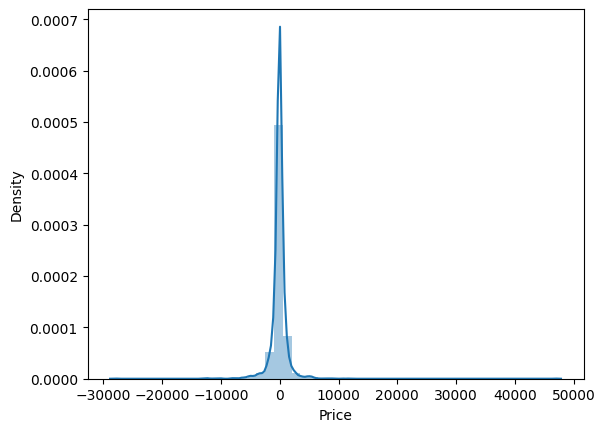

In [48]:
predict(RandomForestRegressor())

Model is: LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-47-32ac19e8c1a2>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


Training score: 0.4746331236897275
Predictions are: [13587.  7832.  6117. ... 13727.  7202. 12373.]


r2 score is: 0.5214535122109092
MAE:1576.0490780141845
MSE:10004550.934751773
RMSE:3162.9971442844794


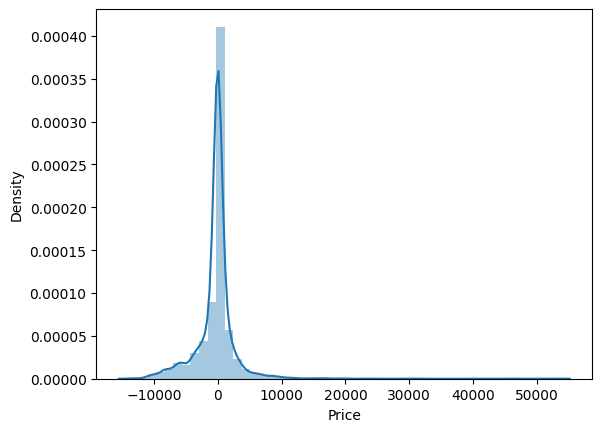

In [49]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.8241845372075705
Predictions are: [14059.6  8315.  13563.  ... 11890.2  6261.   9776. ]


r2 score is: 0.7766359883503893
MAE:1184.648510638298
MSE:4669675.127829788
RMSE:2160.9431107342434


<ipython-input-47-32ac19e8c1a2>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


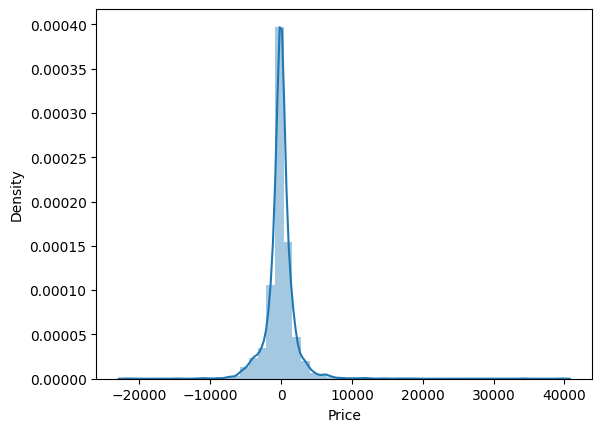

In [50]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9967352874030954
Predictions are: [14848.  7832. 14109. ... 13727.  5158. 12373.]


r2 score is: 0.7497119922006898
MAE:767.8118203309692
MSE:5232551.457966902
RMSE:2287.4770945228943


<ipython-input-47-32ac19e8c1a2>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


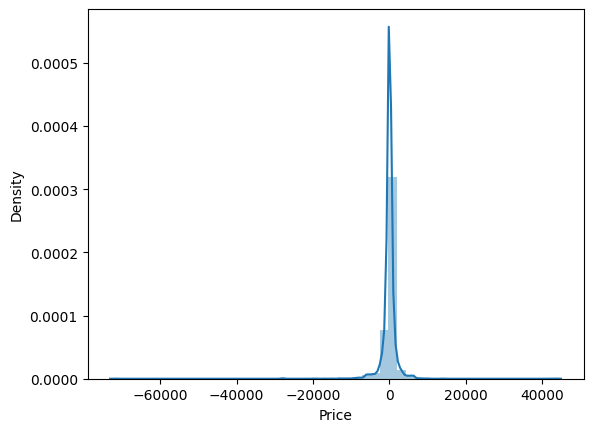

In [51]:
predict(DecisionTreeRegressor())

## Hypertunning the model

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [55]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 20}

In [56]:
# best parameter
rf_random.best_params_

{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 20}

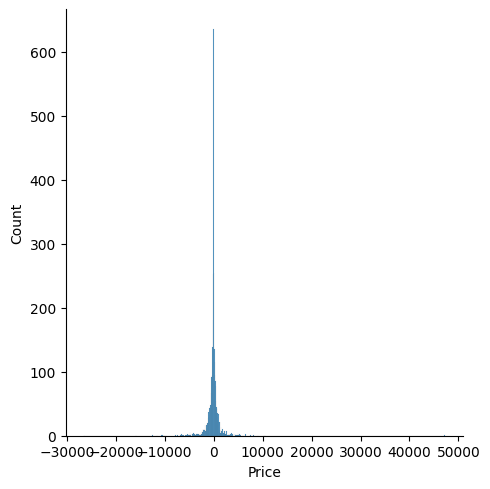

In [57]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [58]:
r2_score(y_test,prediction)

0.8777277176535951